In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import to_datetime
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pmdarima as pm
from pmdarima.model_selection import train_test_split


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
# 포트폴리오 관련 library import

import cvxopt as opt # python version 3.6-3.10 가능
from cvxopt import solvers
from pypfopt.efficient_frontier import EfficientFrontier # 정확하게는 모르겠는데 3.7은 사용가능
from pypfopt import risk_models
from pypfopt import expected_returns

In [3]:
df = pd.read_csv("C:/Users/User/github/Quant/data/kospi_category.csv", encoding='cp949')
start_date = '2004-01'
end_date = '2020-03'
 
df['time'] = pd.date_range(start_date,end_date,freq='m')
df.drop('date',axis=1, inplace=True)
df.set_index('time', inplace=True) 

In [4]:
# train 데이터와 validation 데이터 나누기.
X_train = df[df.index < '2019-01-01']
X_valid = df[df.index >= '2019-01-01']

# 각 데이터의 사이즈 확인하기
print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)

X_train Shape (180, 22)
X_Valid Shape (14, 22)


In [ ]:
# Moving Window 적용
arima_result = []
arima_result_2 = []
arima_result_3 = []
arima_val = []
for i in tqdm(range(len(df.columns))):
    predictions = list()
    history = [x for x in X_train.iloc[:,i]]
    for t in range(len(X_valid)):
        model = pm.auto_arima(y = history)
        output = model.predict()
        yhat = output[0]
        predictions.append(yhat)
        obs = X_valid.iloc[:,i][t]
        history.append(obs)
    
    predictions = pd.Series(predictions, index = X_valid.index)

    print(df.columns[i]+' The MSE of auto-arima is:', mean_squared_error(X_valid.iloc[:,i].values, predictions))
    arima_result.append( mean_squared_error(X_valid.iloc[:,i].values, predictions))
    arima_result_2.append(model.summary())
    arima_result_3.append(r2_score(X_valid.iloc[:,i], predictions))
    arima_val.append(predictions)

    

In [5]:
# Moving Window 적용
# Auto-ARIMA 돌리기 - 계측값이 일별이면 m=1, 월별이면 m=12, 주별이면 m=52, 
# 계절성이 있는 데이터면 seasonal=True 로 바꿔야함. 알아서 d 값을 찾아줌
arima_result = []
arima_result_2 = []
arima_result_3 = []
arima_val = []
for i in tqdm(range(len(df.columns))):
    predictions = list()
    history = [x for x in X_train.iloc[:,i]]
    for t in range(len(X_valid)):
        model = pm.auto_arima(y = history)
        output = model.predict()
        yhat = output[0]
        predictions.append(yhat)
        obs = X_valid.iloc[:,i][t]
        history.append(obs)
    
    predictions = pd.Series(predictions, index = X_valid.index)

    #hart = sns.lineplot(data = pd.DataFrame(X_train.iloc[:,i]))
    #chart.set_title(df.columns[i]+' Auto Arima')

    # plt.plot(X_train.iloc[:,i], color='blue')
    # plt.plot(predictions, color = 'red')
    # plt.plot(X_valid.iloc[:,i], color = 'blue')
    # plt.title(df.columns[i])
    # plt.legend()
    # plt.savefig("C:/Users/User/github/Quant/data/"+df.columns[i]+" moving_window.png")
    print(df.columns[i]+' The MSE of auto-arima is:', mean_squared_error(X_valid.iloc[:,i].values, predictions))
    arima_result.append( mean_squared_error(X_valid.iloc[:,i].values, predictions))
    arima_result_2.append(model.summary())
    arima_result_3.append(r2_score(X_valid.iloc[:,i], predictions))
    arima_val.append(predictions)
    # plt.clf()
    

  5%|▍         | 1/22 [00:07<02:27,  7.04s/it]

제조업 The MSE of auto-arima is: 69869.70982860656


  9%|▉         | 2/22 [00:16<02:50,  8.50s/it]

음식료품 The MSE of auto-arima is: 27358.963728057242


 14%|█▎        | 3/22 [00:44<05:30, 17.38s/it]

섬유의복 The MSE of auto-arima is: 340.46260770421975


 18%|█▊        | 4/22 [01:06<05:43, 19.07s/it]

종이목재 The MSE of auto-arima is: 382.8069225133988


 23%|██▎       | 5/22 [01:37<06:41, 23.64s/it]

화학 The MSE of auto-arima is: 52369.13938800721


 27%|██▋       | 6/22 [01:42<04:37, 17.33s/it]

의약품 The MSE of auto-arima is: 747592.3807111912


 32%|███▏      | 7/22 [01:47<03:19, 13.30s/it]

비금속광물 The MSE of auto-arima is: 6243.490142857144


 36%|███▋      | 8/22 [01:53<02:30, 10.77s/it]

철강금속 The MSE of auto-arima is: 50520.8865357144


 41%|████      | 9/22 [02:06<02:30, 11.58s/it]

기계 The MSE of auto-arima is: 2129.575508596078


 45%|████▌     | 10/22 [02:21<02:31, 12.61s/it]

전기전자 The MSE of auto-arima is: 1477476.87927399


 50%|█████     | 11/22 [02:33<02:16, 12.41s/it]

의료정밀 The MSE of auto-arima is: 62943.14033320832


 55%|█████▍    | 12/22 [02:38<01:41, 10.18s/it]

운수장비 The MSE of auto-arima is: 9970.688257142854


 59%|█████▉    | 13/22 [02:44<01:19,  8.87s/it]

유통업 The MSE of auto-arima is: 377.6617142857147


 64%|██████▎   | 14/22 [03:03<01:36, 12.02s/it]

전기가스업 The MSE of auto-arima is: 4817.700157436165


 68%|██████▊   | 15/22 [03:07<01:05,  9.40s/it]

건설업 The MSE of auto-arima is: 46.83447857142858


 73%|███████▎  | 16/22 [03:11<00:47,  7.92s/it]

운수창고업 The MSE of auto-arima is: 5325.152799999994


 77%|███████▋  | 17/22 [03:18<00:37,  7.53s/it]

통신업 The MSE of auto-arima is: 147.387692857143


 82%|████████▏ | 18/22 [03:27<00:32,  8.18s/it]

금융업 The MSE of auto-arima is: 446.9439358912327


 86%|████████▋ | 19/22 [03:35<00:23,  7.96s/it]

은행 The MSE of auto-arima is: 216.82689653920417


 91%|█████████ | 20/22 [03:44<00:16,  8.30s/it]

증권 The MSE of auto-arima is: 9795.285551624653


 95%|█████████▌| 21/22 [03:59<00:10, 10.32s/it]

보험 The MSE of auto-arima is: 837588.5221267983


100%|██████████| 22/22 [04:05<00:00, 11.15s/it]

서비스업 The MSE of auto-arima is: 1226.7039571428556


In [6]:
predict = pd.DataFrame(arima_val).T

In [172]:
predict

,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
time,,,,,,,,,,,,,,,,,,,,,
2019-01-31,4579.620000,3907.933949,247.084996,357.660000,4782.249480,11626.690000,1661.05,4043.12,738.343602,14107.500651,...,393.50,1050.600000,112.60,1341.29,397.99,434.405401,298.840542,1689.914681,16366.798971,1080.00
2019-02-28,5107.312889,4123.928441,264.231124,384.200000,5165.449694,11832.235167,1817.81,4450.89,867.915411,17289.127010,...,411.92,1107.880000,121.54,1402.56,373.77,450.421487,292.368806,1808.854841,16706.032030,1135.15
2019-03-31,5057.499116,4014.010000,286.280000,390.020000,5408.541770,11473.640000,1747.23,4376.72,771.663661,16739.323094,...,415.66,1102.520000,113.32,1435.11,375.12,453.026183,290.303358,1806.570077,17357.423109,1146.03
2019-04-30,4920.945549,4050.360000,321.507035,386.450000,5110.770000,10302.940000,1730.43,4213.82,795.852745,16593.430000,...,420.20,965.780000,111.53,1312.44,365.61,441.885372,292.203831,1791.345470,17148.552039,1148.32
2019-05-31,5117.491585,3991.860000,328.828223,397.010000,5133.950000,11127.720000,1691.35,4246.97,764.395745,17239.070273,...,424.29,929.360000,111.29,1487.28,356.33,450.371311,294.305227,1863.882470,17149.576152,1159.85
2019-06-30,4670.680000,3645.130000,292.800000,381.550000,4543.100190,9951.760000,1651.96,3969.08,768.828040,15748.069603,...,377.70,851.310000,108.39,1447.12,358.04,428.268463,288.249798,1819.109965,15826.439900,1091.96
2019-07-31,4964.024000,3740.900000,298.430000,391.830000,4733.170000,10349.470000,1699.23,4145.27,748.989224,17174.241144,...,388.00,844.460000,113.78,1363.13,368.47,438.398572,292.158141,1943.554567,15485.286899,1112.03
2019-08-31,4710.390000,3450.110000,275.338652,351.719539,4530.181316,8937.990000,1506.53,3815.12,724.687002,16570.444243,...,353.53,901.270000,98.33,1283.44,350.47,408.586038,274.351496,1830.074449,14554.027240,1106.70
2019-09-30,4606.330000,3251.380000,264.374935,354.544495,4459.497616,8538.840000,1543.00,3638.72,711.913788,16344.658627,...,341.96,855.619877,94.16,1290.76,342.16,382.174883,259.530399,1734.186704,12936.806535,1118.23


In [173]:
X_valid

,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
time,,,,,,,,,,,,,,,,,,,,,
2019-01-31,5087.28,4047.11,267.78,384.20,5142.43,11773.39,1817.81,4450.89,848.14,16947.32,...,411.92,1107.88,121.54,1402.56,373.77,451.09,293.77,1833.75,16780.72,1135.15
2019-02-28,5037.85,4014.01,286.28,390.02,5275.01,11473.64,1747.23,4376.72,796.47,16675.95,...,415.66,1102.52,113.32,1435.11,375.12,453.81,291.58,1801.49,17463.20,1146.03
2019-03-31,4902.15,4050.36,312.50,386.45,5110.77,10302.94,1730.43,4213.82,753.79,16593.43,...,420.20,965.78,111.53,1312.44,365.61,442.16,293.58,1789.45,17090.50,1148.32
2019-04-30,5097.73,3991.86,318.99,397.01,5133.95,11127.72,1691.35,4246.97,791.51,17173.67,...,424.29,929.36,111.29,1487.28,356.33,451.03,295.79,1877.80,17160.48,1159.85
2019-05-31,4670.68,3645.13,292.80,381.55,4669.26,9951.76,1651.96,3969.08,737.95,15669.14,...,377.70,851.31,108.39,1447.12,358.04,427.92,289.39,1808.10,15579.44,1091.96
2019-06-30,4945.30,3740.90,298.43,391.83,4733.17,10349.47,1699.23,4145.27,765.30,17071.05,...,388.00,844.46,113.78,1363.13,368.47,438.51,293.51,1969.14,15468.15,1112.03
2019-07-31,4710.39,3450.11,285.99,343.65,4525.94,8937.99,1506.53,3815.12,716.77,16689.78,...,353.53,901.27,98.33,1283.44,350.47,407.35,274.70,1803.42,14388.27,1106.70
2019-08-31,4606.33,3251.38,266.49,364.67,4369.96,8538.84,1543.00,3638.72,709.21,16277.85,...,341.96,827.50,94.16,1290.76,342.16,379.80,259.04,1721.07,12879.06,1118.23
2019-09-30,4896.77,3453.54,285.42,348.74,4461.52,8978.69,1522.35,3778.30,744.99,17780.19,...,349.36,837.46,100.16,1265.60,347.23,391.95,275.50,1767.69,13150.57,1138.31


---
#### 미래 예측 완료
#### train 구간만 사용한 포트폴리오와 예측 구간까지 사용한 포트폴리오의 차이를 확인할 것임
#### train 구간이 움직일때 포트폴리오를 다시 최적화 할것임.
#### 즉 한달 주기로 포트폴리오를 다시 구성한다고 생각하면 될것.
#### 수수료는 없다고 가정
#### 처음 주식을 구매하고 주식을 전부 판매하고 다시 주식을 구매하는 것으로 돈을 계속 계산할 것임

In [7]:
weights = np.ones(22) # 초기에 가중치를 1로 설정
weights = weights/22 # 이후 동일하게 1/22으로 나눠서 설정 (가중치 합은 항상 1)

returns=X_train.pct_change() # 단순 수익률 계산 => (다음날 값 +- 기준일 값)/기준일 값 으로 수익률 나옵니다.

cov_matrix_annual=returns.cov()*12 # 데이터 기준이 DAY가 아니라 MONTH이므로 12를 곱해 연간 수익률로 계산

port_variance=np.dot(weights.T, np.dot(cov_matrix_annual, weights)) # 포트폴리오 분산의 기대값 = WT * (공분산{= 시그마}) * W를 코드로 옆처럼 나타냄

port_volatility=np.sqrt(port_variance) # 포트폴리오 변동성의 기대값 = SQRT(WT * 공분산(=시그마) * W) // 그냥 표준편차 = 변동성

portfolioSimpleAnnualReturn=np.sum(returns.mean()*weights)*12 # 연간 수익률 계산 DAY가 아니라 MONTH기준이므로 12곱하면 됨

In [8]:
percent_var=str(round(port_variance,2)*100)+'%'
percent_vol=str(round(port_volatility,2)*100)+'%'
percent_ret=str(round(portfolioSimpleAnnualReturn,2)*100)+'%'

In [9]:
print('Expected Annual Return :'+ percent_ret )
print('Annual Volatility/risk :'+ percent_vol )
print('Annual Variance :'+ percent_var )

Expected Annual Return :9.0%
Annual Volatility/risk :19.0%
Annual Variance :3.0%


In [10]:
# Portfolio optimization

# Calculate the expexted returns and annualised sample covariance matrix of the asset returns
mu=expected_returns.mean_historical_return(X_train, frequency=12) # 앞과 동일하게 data가 month기준
S=risk_models.sample_cov(X_train, frequency= 12) # 앞과 동일하게 data가 month기준

# Optimize the max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('제조업', 0.0), ('음식료품', 0.0), ('섬유의복', 0.0), ('종이목재', 0.0), ('화학', 0.26938), ('의약품', 0.55999), ('비금속광물', 0.0), ('철강금속', 0.0), ('기계', 0.0), ('전기전자', 0.16066), ('의료정밀', 0.00997), ('운수장비', 0.0), ('유통업', 0.0), ('전기가스업', 0.0), ('건설업', 0.0), ('운수창고업', 0.0), ('통신업', 0.0), ('금융업', 0.0), ('은행', 0.0), ('증권', 0.0), ('보험', 0.0), ('서비스업', 0.0)])
Expected annual return: 13.5%
Annual volatility: 21.6%
Sharpe Ratio: 0.53


(0.13492968879251077, 0.2161293716058797, 0.5317633967959224)

In [178]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(X_train)
weights = cleaned_weights 

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000000000)
allocation, leftover = da.lp_portfolio()

print("Discrete allocation:", allocation) # 해당주를 얼마나 구입하는가
print("Funds remaining: ${:.2f}".format(leftover)) # 예상 수익

Discrete allocation: {'화학': 55258229, '의약품': 48164181, '전기전자': 11120633, '의료정밀': 4672324}
Funds remaining: $902.32


In [12]:
predict.columns = np.array(X_train.columns)

In [13]:
total = pd.concat([ X_train, predict])

In [14]:
print(len(X_train))
print(len(total))

180
194


In [15]:
## 동일 가중치 포트폴리오를 계속 

weights = np.ones(22) 
weights = weights/22 
returns=X_train.pct_change() 
cov_matrix_annual=returns.cov()*12
port_variance=np.dot(weights.T, np.dot(cov_matrix_annual, weights)) 
port_volatility=np.sqrt(port_variance) 
portfolioSimpleAnnualReturn=np.sum(returns.mean()*weights)*12 

In [16]:
pd.DataFrame(predict.iloc[0,:]).T

,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
2019-01-31,4579.62,3907.933949,247.084996,357.66,4782.24948,11626.69,1661.05,4043.12,738.343602,14107.500651,...,393.5,1050.6,112.6,1341.29,397.99,434.405401,298.840542,1689.914681,16366.798971,1080.0


In [17]:
X_tarin_input = pd.concat([X_train, pd.DataFrame(predict.iloc[0,:]).T])

In [184]:
a = 100000000
solution = []
money = []
sol = pd.DataFrame(index=range(0,1), columns = df.columns)
for i in range(0,13):
    latest_prices = get_latest_prices(pd.concat([X_train, pd.DataFrame(predict.iloc[i,:]).T]))
    weights = cleaned_weights 

    da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=a)
    solution.append(da.lp_portfolio())
    money.append(a)
    sol = pd.merge(sol, pd.DataFrame.from_dict(data = solution[i][0], orient='index', dtype='int').T, how = 'outer').fillna(0) 
    a += pd.DataFrame(solution).iloc[i,1]*1200


In [185]:
b = 100000000
solution_2 = []
money_2 = []
sol_2 = pd.DataFrame(index=range(0,1), columns = df.columns)
for i in range(0,13):
    latest_prices_2 = get_latest_prices(pd.concat([X_train, pd.DataFrame(X_valid.iloc[i,:]).T]))
    weights_2 = cleaned_weights 

    da = DiscreteAllocation(weights_2, latest_prices_2, total_portfolio_value=b)
    solution_2.append(da.lp_portfolio())
    money_2.append(b)
    sol_2 = pd.merge(sol_2, pd.DataFrame.from_dict(data = solution_2[i][0], orient='index', dtype='int').T, how = 'outer').fillna(0) 
    b += pd.DataFrame(solution_2).iloc[i,1]*1200

In [186]:
money

[100000000,
 100443134.52113867,
 100458690.9362793,
 101290961.3855362,
 101327559.58693624,
 106039298.40224385,
 106112996.2855041,
 106332103.81138325,
 106879161.75991297,
 107634496.19077444,
 111929013.46300244,
 114177868.44329834,
 114552769.36017275]

Text(0.5, 1.0, '포트폴리오 업데이트 횟수별 예상 자산 변화')

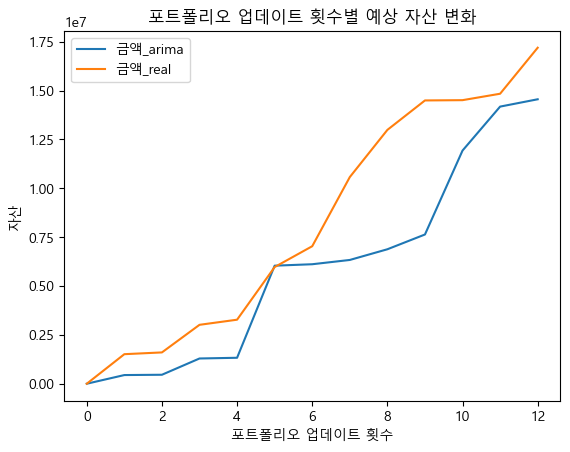

In [187]:
plt.plot((pd.DataFrame(money)-100000000), label = '금액_arima')
plt.plot((pd.DataFrame(money_2)-100000000), label = '금액_real')
plt.xlabel('포트폴리오 업데이트 횟수')
plt.ylabel('자산')
plt.legend()
plt.title('포트폴리오 업데이트 횟수별 예상 자산 변화')

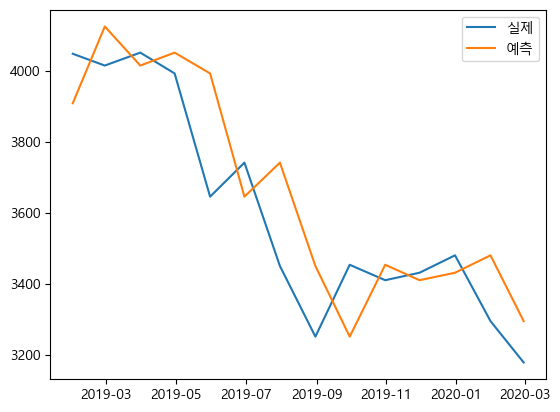

In [191]:
plt.plot(X_valid.iloc[:,1], label = '실제')
plt.plot(predict.iloc[:,1], label = '예측')
plt.legend()

In [181]:
(sol_2@X_valid.T).sum()

time
2019-01-31    1.436930e+09
2019-02-28    1.421716e+09
2019-03-31    1.325440e+09
2019-04-30    1.394638e+09
2019-05-31    1.256270e+09
2019-06-30    1.307382e+09
2019-07-31    1.185846e+09
2019-08-31    1.141246e+09
2019-09-30    1.197339e+09
2019-10-31    1.338471e+09
2019-11-30    1.291078e+09
2019-12-31    1.381416e+09
2020-01-31    1.349099e+09
2020-02-29    1.296637e+09
dtype: float64

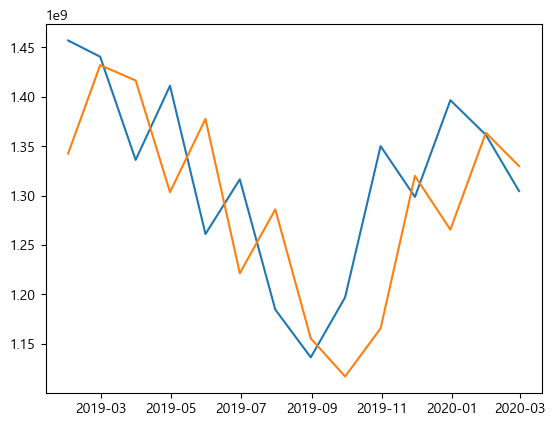

In [192]:
plt.plot((sol_2@X_valid.T).sum()-100000000, label = '실제')
plt.plot((sol@predict.T).sum()-100000000, label = 'arima')

In [161]:
(sol.iloc[1:,:]@predict.T).sum()

time
2019-01-31    1.360158e+09
2019-02-28    1.444563e+09
2019-03-31    1.429842e+09
2019-04-30    1.323428e+09
2019-05-31    1.393308e+09
2019-06-30    1.246062e+09
2019-07-31    1.307055e+09
2019-08-31    1.184026e+09
2019-09-30    1.147730e+09
2019-10-31    1.193546e+09
2019-11-30    1.339008e+09
2019-12-31    1.287774e+09
2020-01-31    1.380238e+09
2020-02-29    1.348448e+09
dtype: float64

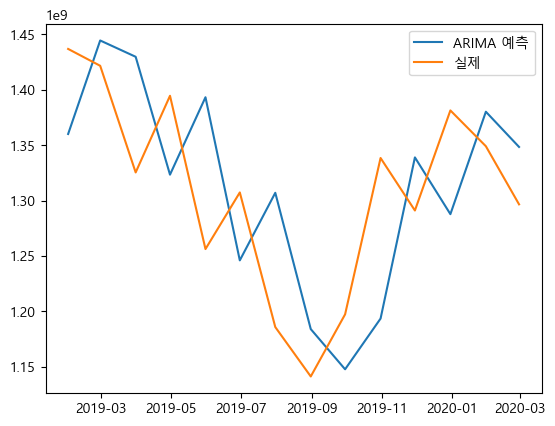

In [163]:
plt.plot((sol@predict.T).sum(), label ='ARIMA 예측')
plt.plot((sol_2@X_valid.T).sum(), label = '실제')
plt.legend()
plt.show()